In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import os

In [ ]:
file_path = r'C:\Users\aghaa\OneDrive\000A - Finished My Python Coding Files\data\car+evaluation\car.data'
if os.path.exists(file_path):
    print('File Exists')
    try: 
        df = pd.read_csv(filepath_or_buffer=file_path, header=None)
        print(df.head())
    except Exception as e:
        print(f'Error reading file: {e}')
else:
    print('File does not exist')
    input('Please enter a valid file path')

File Exists
       0      1  2  3      4     5      6
0  vhigh  vhigh  2  2  small   low  unacc
1  vhigh  vhigh  2  2  small   med  unacc
2  vhigh  vhigh  2  2  small  high  unacc
3  vhigh  vhigh  2  2    med   low  unacc
4  vhigh  vhigh  2  2    med   med  unacc


In [3]:
print('Number of Observations:', df.shape[0], 'Number of Variables:', df.shape[1])

Number of Observations: 1728 Number of Variables: 7


In [4]:
expected_columns = 7
if df.shape[1] == expected_columns:
    column_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
    df.rename(columns=dict(zip(df.columns, column_names)), inplace=True)
    print(df.head())

else:
    print(f'Warning: Expected {expected_columns} columns but found {df.shape[1]} columns')

  buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB
None


In [6]:
for col in df.columns:
    print(df[col].value_counts())

buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64
persons
2       576
4       576
more    576
Name: count, dtype: int64
lug_boot
small    576
med      576
big      576
Name: count, dtype: int64
safety
low     576
med     576
high    576
Name: count, dtype: int64
class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [ ]:
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(df['class'])
print(label_encoder.classes_)

['acc' 'good' 'unacc' 'vgood']


In [ ]:
df['class_encoded'] = label_encoder.transform(df['class']) 
print(df.head())

  buying  maint doors persons lug_boot safety  class  class_encoded
0  vhigh  vhigh     2       2    small    low  unacc              2
1  vhigh  vhigh     2       2    small    med  unacc              2
2  vhigh  vhigh     2       2    small   high  unacc              2
3  vhigh  vhigh     2       2      med    low  unacc              2
4  vhigh  vhigh     2       2      med    med  unacc              2


In [9]:

for label, count in df['class'].value_counts().items():
    print(f'Label: {label} \tEncode: {label_encoder.transform([label])[0]} \tCount: {count}')

Label: unacc 	Encode: 2 	Count: 1210
Label: acc 	Encode: 0 	Count: 384
Label: good 	Encode: 1 	Count: 69
Label: vgood 	Encode: 3 	Count: 65


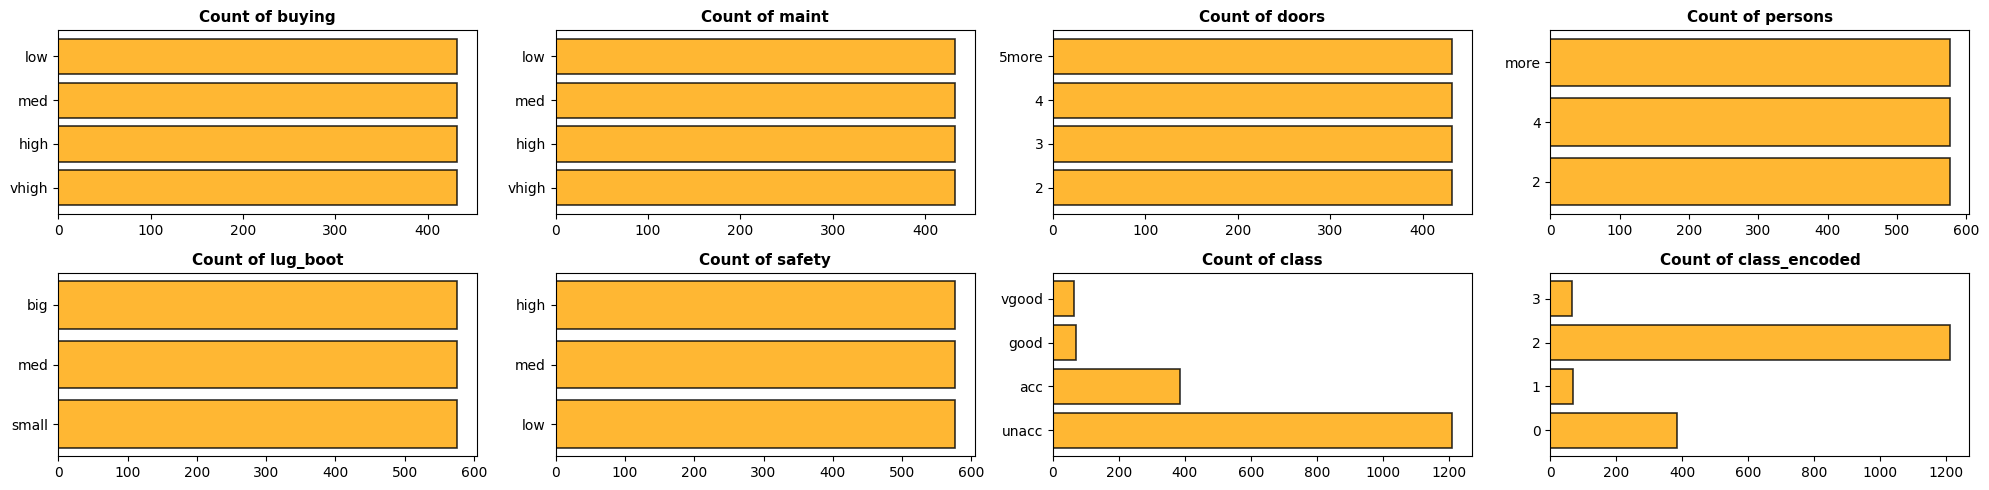

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 5))
for i, col in enumerate(df.columns):
    ax = axes[i // 4, i % 4]
    ax.barh(y=df[col].value_counts().index, width=df[col].value_counts(), color='orange', edgecolor='black', linewidth=1.2, alpha=0.8)
    ax.set_title(f'Count of {col}', fontsize=11, fontweight='bold')
plt.tight_layout()
plt.show()

In [11]:
# You can use the inverse_transform method to reverse the transformation performed by the `label_encoder.transform` method. 
# The method converts the encoded labels back to their original values.
label_encoder.inverse_transform([0, 1, 2, 3])

array(['acc', 'good', 'unacc', 'vgood'], dtype=object)